In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("/content/Thyroid_data.csv")

;
; Thyroid disease records supplied by the Garavan Institute and J. Ross
; Quinlan, New South Wales Institute, Syndney, Australia.
;
; 1987.
;

This directory contains the latest version of an archive of thyroid diagnoses
obtained from the Garvan Institute, consisting of 9172 records from 1984 to
early 1987.  Each record looks like

	(29 attribute values), diagnoses [record identification]

The attributes are given in order and separated by commas.  Unknown attribute
values are indicated by question marks.  The attributes are

	Attribute Name			Possible Values
	--------------			---------------
	age:				continuous.
	sex:				M, F.
	on thyroxine:			f, t.
	query on thyroxine:		f, t.
	on antithyroid medication:	f, t.
	sick:				f, t.
	pregnant:			f, t.
	thyroid surgery:		f, t.
	I131 treatment:			f, t.
	query hypothyroid:		f, t.
	query hyperthyroid:		f, t.
	lithium:			f, t.
	goitre:				f, t.
	tumor:				f, t.
	hypopituitary:			f, t.
	psych:				f, t.
	TSH measured:			f, t.
	TSH:				continuous.
	T3 measured:			f, t.
	T3:				continuous.
	TT4 measured:			f, t.
	TT4:				continuous.
	T4U measured:			f, t.
	T4U:				continuous.
	FTI measured:			f, t.
	FTI:				continuous.
	TBG measured:			f, t.
	TBG:				continuous.
	referral source:		WEST, STMW, SVHC, SVI, SVHD, other.

The diagnosis consists of a string of letters indicating diagnosed conditions.
A diagnosis "-" indicates no condition requiring comment.  A diagnosis of the
form "X|Y" is interpreted as "consistent with X, but more likely Y".  The
conditions are divided into groups where each group corresponds to a class of
comments.

		Letter	Diagnosis
		------	---------

	hyperthyroid conditions:

		A	hyperthyroid
		B	T3 toxic
		C	toxic goitre
		D	secondary toxic

	hypothyroid conditions:

		E	hypothyroid
		F	primary hypothyroid
		G	compensated hypothyroid
		H	secondary hypothyroid

	binding protein:

		I	increased binding protein
		J	decreased binding protein

	general health:

		K	concurrent non-thyroidal illness

	replacement therapy:

		L	consistent with replacement therapy
		M	underreplaced
		N	overreplaced

	antithyroid treatment:

		O	antithyroid drugs
		P	I131 treatment
		Q	surgery

	miscellaneous:

		R	discordant assay results
		S	elevated TBG
		T	elevated thyroid hormones

In experiments with an earlier version of this archive, decision trees were
derived for the most frequent classes of comments, namely

	hyperthyroid conditions (A, B, C, D)
	hypothyroid conditions (E, F, G, H)
	binding protein (I, J)
	general health (K)
	replacement therapy (L, M, N)
	discordant results (R)

In [6]:
df.head().T

,0,1,2,3,4
29,29,41,36,32,60
F,F,F,F,F,F
f,f,f,f,f,f
f.1,f,f,f,f,f
f.2,f,f,f,f,f
f.3,f,f,f,f,f
f.4,f,f,f,f,f
f.5,f,f,f,f,f
f.6,f,f,f,f,f
t,f,f,f,f,f


The data has 30 elements i.e. 0 included but the attrbutes we have are 29 so adding additional column named 'diagnosis_column'

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   29            9171 non-null   int64 
 1   F             9171 non-null   object
 2   f             9171 non-null   object
 3   f.1           9171 non-null   object
 4   f.2           9171 non-null   object
 5   f.3           9171 non-null   object
 6   f.4           9171 non-null   object
 7   f.5           9171 non-null   object
 8   f.6           9171 non-null   object
 9   t             9171 non-null   object
 10  f.7           9171 non-null   object
 11  f.8           9171 non-null   object
 12  f.9           9171 non-null   object
 13  f.10          9171 non-null   object
 14  f.11          9171 non-null   object
 15  f.12          9171 non-null   object
 16  t.1           9171 non-null   object
 17  0.3           9171 non-null   object
 18  f.13          9171 non-null   object
 19  ?     

In [8]:
# List of attribute names (in order)
attribute_names = [
    "age", "sex", "on thyroxine", "query on thyroxine", "on antithyroid medication",
    "sick", "pregnant", "thyroid surgery", "I131 treatment", "query hypothyroid",
    "query hyperthyroid", "lithium", "goitre", "tumor", "hypopituitary", "psych",
    "TSH measured", "TSH", "T3 measured", "T3", "TT4 measured", "TT4",
    "T4U measured", "T4U", "FTI measured", "FTI", "TBG measured", "TBG",
    "referral source", "diagnosis_column"
]

In [9]:
df.columns = attribute_names

In [10]:
df.head().T

,0,1,2,3,4
age,29,41,36,32,60
sex,F,F,F,F,F
on thyroxine,f,f,f,f,f
query on thyroxine,f,f,f,f,f
on antithyroid medication,f,f,f,f,f
sick,f,f,f,f,f
pregnant,f,f,f,f,f
thyroid surgery,f,f,f,f,f
I131 treatment,f,f,f,f,f
query hypothyroid,f,f,f,f,f


In [11]:
df.tail().T

,9166,9167,9168,9169,9170
age,56,22,69,47,31
sex,M,M,M,F,M
on thyroxine,f,f,f,f,f
query on thyroxine,f,f,f,f,f
on antithyroid medication,f,f,f,f,f
sick,f,f,f,f,f
pregnant,f,f,f,f,f
thyroid surgery,f,f,f,f,f
I131 treatment,f,f,f,f,f
query hypothyroid,f,f,f,f,t


Now, we have our dataset in csv with proper attributes i.e column names.

In [12]:
df.shape

(9171, 30)


# Data Analysis & Cleaning Pipeline


Step 1: Data Inspection & Preprocessing

Data Understanding and Preparation

Data Analysis, Cleaning, and Transformation

Begin: Data Exploration & Preprocessing

In [13]:
df.sample(50).T

,303,3006,3467,2056,9023,3608,6880,1095,886,8600,...,5255,4036,6842,7621,9024,7403,419,3531,2214,2889
age,48,41,64,69,61,68,73,59,52,70,...,35,66,58,36,61,38,54,22,89,70
sex,F,M,F,F,F,F,F,M,F,M,...,F,F,M,F,F,F,F,M,M,F
on thyroxine,t,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
query on thyroxine,t,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
on antithyroid medication,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
sick,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,t,f,f,f,f,f
pregnant,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
thyroid surgery,f,f,f,f,f,f,f,f,f,f,...,t,f,f,f,f,f,f,f,f,f
I131 treatment,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
query hypothyroid,f,f,t,f,f,t,f,f,f,f,...,f,f,f,f,f,f,t,f,f,f


Extracting respective diagnosis code (letters) from diagnosis column

In [14]:
# Example column name with diagnosis strings:
# df['diagnosis_column'] = ['A[840801013]', 'K[840801045]', '-[840801017]', 'A|B[840801018]']

# Extract the diagnosis part before the '['
df['diagnosis_code'] = df['diagnosis_column'].str.extract(r'^(.+?)\[')[0]

In [15]:
df.sample(70).T

,807,7790,3923,7708,3342,157,1542,8958,4650,452,...,1461,4635,1082,3844,7468,1799,656,1109,4033,6860
age,34,48,48,38,34,49,57,27,20,60,...,22,26,61,76,84,27,43,22,60,69
sex,F,M,F,F,F,M,F,F,F,F,...,F,F,M,F,M,F,F,M,M,M
on thyroxine,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,t,f,f
query on thyroxine,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
on antithyroid medication,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,f,f,f,f
sick,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
pregnant,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
thyroid surgery,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
I131 treatment,f,f,f,f,f,f,t,f,f,f,...,f,f,f,f,f,f,f,f,f,f
query hypothyroid,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f


To cross check the extraction of diagnosis code properly, we use;

In [16]:
# Example: filter rows matching the A|B[numbers] pattern
filtered_df = df[df['diagnosis_column'].str.match(r'^[A-Z]\|[A-Z]\[\d+\]')]

# Print the matching rows
print(filtered_df)

      age sex on thyroxine query on thyroxine on antithyroid medication sick  \
259    32   F            t                  f                         f    f   
416    55   F            f                  f                         f    f   
520    34   F            t                  f                         f    f   
1963   31   F            f                  f                         f    f   
2650   34   F            f                  f                         f    f   
3057   26   F            f                  f                         f    f   
4228   38   F            f                  f                         f    f   
4282   18   F            f                  f                         f    f   
4284   29   F            f                  f                         f    f   
4379   21   ?            f                  f                         f    f   
4402   41   M            f                  f                         f    f   
5329   19   F            f              

As the output shows, we extracted the diagnosis codes properly even of X|Y type

Now, lets apply the rule of th study i.e "The diagnosis consists of a string of letters indicating diagnosed conditions.
A diagnosis "-" indicates no condition requiring comment.  A diagnosis of the
form "X|Y" is interpreted as "consistent with X, but more likely Y".  The
conditions are divided into groups where each group corresponds to a class of
comments."

In [17]:
# - If there's a pipe (|), take the letter after the pipe
# - Else if multiple letters (e.g., AK), take the last one
# - If "-", label as "negative"

def extract_primary_diagnosis(code):
    if pd.isna(code):
        return None
    if code == "-":
        return "negative"
    if "|" in code:
        return code.split("|")[-1]  # more likely one
    return code[-1]  # last letter if no pipe

# Apply the logic
df['primary_diagnosis'] = df['diagnosis_code'].apply(extract_primary_diagnosis)

# Optional: View only diagnosis rows (not 'negative')
diagnosis_only = df[df['primary_diagnosis'] != '-']

# Print result
print(df[['diagnosis_column', 'primary_diagnosis']])


     diagnosis_column primary_diagnosis
0        -[840801014]          negative
1        -[840801042]          negative
2        -[840803046]          negative
3        S[840803047]                 S
4        -[840803048]          negative
...               ...               ...
9166     -[870119022]          negative
9167     -[870119023]          negative
9168     I[870119025]                 I
9169     -[870119027]          negative
9170     -[870119035]          negative

[9171 rows x 2 columns]


In [18]:
df.head(30).T

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
age,29,41,36,32,60,77,28,28,28,54,...,40,40,77,77,77,77,51,75,56,42
sex,F,F,F,F,F,F,F,F,F,F,...,F,F,F,?,F,F,F,F,M,M
on thyroxine,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
query on thyroxine,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
on antithyroid medication,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
sick,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
pregnant,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
thyroid surgery,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
I131 treatment,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
query hypothyroid,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f


In [19]:
code_Check = df['primary_diagnosis']
print(code_Check.str.match(r'^[A-Z]\|[A-Z]\[\d+\]'))

0       False
1       False
2       False
3       False
4       False
        ...  
9166    False
9167    False
9168    False
9169    False
9170    False
Name: primary_diagnosis, Length: 9171, dtype: bool


"X|Y" is interpreted as "consistent with X, but more likely Y" rule applied

In [20]:
# Now, let's map the diagnosis codes to their respective groups.

diagnosis_group_mapping = {
    'negative': 'negative',

    'A': 'hyperthyroid conditions',
    'B': 'hyperthyroid conditions',
    'C': 'hyperthyroid conditions',
    'D': 'hyperthyroid conditions',

    'E': 'hypothyroid conditions',
    'F': 'hypothyroid conditions',
    'G': 'hypothyroid conditions',
    'H': 'hypothyroid conditions',

    'I': 'binding protein',
    'J': 'binding protein',

    'K': 'general health',

    'L': 'replacement therapy',
    'M': 'replacement therapy',
    'N': 'replacement therapy',

    'O': 'antithyroid treatment',
    'P': 'antithyroid treatment',
    'Q': 'antithyroid treatment',

    'R': 'discordant results',
    'S': 'miscellaneous',
    'T': 'miscellaneous',
}


In [21]:
df['class'] = df['primary_diagnosis'].map(diagnosis_group_mapping)

In [22]:
print(df[['primary_diagnosis','class']].sample(50))

     primary_diagnosis                    class
5814                 F   hypothyroid conditions
1364                 A  hyperthyroid conditions
8758          negative                 negative
9144          negative                 negative
2346          negative                 negative
4685          negative                 negative
1933          negative                 negative
774           negative                 negative
2247          negative                 negative
836           negative                 negative
2791          negative                 negative
1143          negative                 negative
3178          negative                 negative
4362                 R       discordant results
5087          negative                 negative
4092          negative                 negative
6950          negative                 negative
5506                 R       discordant results
2369          negative                 negative
6538          negative                 n

In [23]:
# saving our previous df in a new dataframe and dropping extra columns like 'primary_diagnosis', 'diagnosis_column' 'primary_letter 'and 'diagnosis_code'

new_df = df.drop(columns=['primary_diagnosis', 'diagnosis_column', 'diagnosis_code'])

In [24]:
new_df.sample(10).T

,8657,5068,918,8974,8470,7276,4834,6756,3555,3879
age,61,43,40,36,60,27,13,74,30,68
sex,F,?,F,?,M,F,M,F,M,F
on thyroxine,f,t,f,f,f,f,f,f,f,f
query on thyroxine,f,f,f,f,f,f,f,f,f,f
on antithyroid medication,f,f,f,f,f,f,f,f,f,f
sick,f,f,f,f,f,f,f,f,f,f
pregnant,f,f,f,f,f,f,f,f,f,f
thyroid surgery,f,f,f,f,f,f,f,f,f,f
I131 treatment,f,f,f,f,f,f,f,f,f,f
query hypothyroid,f,f,f,f,f,f,f,f,f,f


In [25]:
# This code counts the number of occurrences of each value in the 'Class' column of the df dataframe.
new_df['class'].value_counts()

,count
class,
negative,6770
hypothyroid conditions,593
general health,561
binding protein,414
replacement therapy,336
discordant results,197
hyperthyroid conditions,182
miscellaneous,85
antithyroid treatment,33


In [26]:
new_df.shape

(9171, 30)

Checking *Duplicated*

In [27]:
# This code counts the number of duplicate rows in a Pandas DataFrame
new_df.duplicated().sum()

np.int64(10)

Checking *Null Values*

In [28]:
# This code uses the isna() function to check for null values in a dataframe and returns the sum of them.
new_df.isna().sum()

,0
age,0
sex,0
on thyroxine,0
query on thyroxine,0
on antithyroid medication,0
sick,0
pregnant,0
thyroid surgery,0
I131 treatment,0
query hypothyroid,0


In [29]:
for column in new_df.columns:
  # Count the number of missing values represented by '?'
  missing_count = new_df[column][new_df[column] == '?'].count()
  # If missing values are found, print the column name and count
  if missing_count != 0:
    print(f"Count of '?' in {column}:",column, missing_count)

Count of '?' in sex: sex 307
Count of '?' in TSH: TSH 842
Count of '?' in T3: T3 2603
Count of '?' in TT4: TT4 441
Count of '?' in T4U: T4U 808
Count of '?' in FTI: FTI 801
Count of '?' in TBG: TBG 8822


In [30]:
# Drop the 'TBG' column as it contains all missing values
new_df = new_df.drop('TBG', axis=1)

In [31]:
df.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'TBG measured', 'TBG', 'referral source',
       'diagnosis_column', 'diagnosis_code', 'primary_diagnosis', 'class'],
      dtype='object')

In [32]:
new_df.shape

(9171, 29)

# Numerical and Categorical Features

In [33]:
numeric_features = [feature for feature in new_df.columns if new_df[feature].dtype != 'O']
categorical_features = [feature for feature in new_df.columns if new_df[feature].dtype == 'O']
# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 1 numerical features : ['age']

We have 28 categorical features : ['sex', 'on thyroxine', 'query on thyroxine', 'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery', 'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH', 'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U', 'FTI measured', 'FTI', 'TBG measured', 'referral source', 'class']


In [34]:
#finding dataytypes of each features
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        9171 non-null   int64 
 1   sex                        9171 non-null   object
 2   on thyroxine               9171 non-null   object
 3   query on thyroxine         9171 non-null   object
 4   on antithyroid medication  9171 non-null   object
 5   sick                       9171 non-null   object
 6   pregnant                   9171 non-null   object
 7   thyroid surgery            9171 non-null   object
 8   I131 treatment             9171 non-null   object
 9   query hypothyroid          9171 non-null   object
 10  query hyperthyroid         9171 non-null   object
 11  lithium                    9171 non-null   object
 12  goitre                     9171 non-null   object
 13  tumor                      9171 non-null   object
 14  hypopitu

In [35]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9171.0,73.56068,1184.041182,1.0,37.0,55.0,68.0,65526.0


as you can see we have outlier in the age column. We would look into outliers later

In [36]:
#filling missing dat ain the form of ? by np.nan values
new_df.isin(['?']).sum().sum()

np.int64(5802)

Overall 5802 values are missing in the form of '?'

In [37]:
new_df.replace('?',np.nan,inplace=True)

In [38]:
new_df.shape

(9171, 29)

Removing More Redundant Columns from Dataset

In [39]:
# Since actual values are present in TSH, T3, TT4, T4U FTI so their measured values are not significant
# for prediction of thyroid disease so we can remove them
columns_to_drop = ['TSH measured', 'T3 measured', 'TT4 measured', 'T4U measured', 'FTI measured', 'TBG measured']
new_df.drop(columns=columns_to_drop, axis=1, inplace=True)

In [40]:
#filling missing dat ain the form of ? by np.nan values
new_df.isin(['?']).sum().sum()

np.int64(0)

In [41]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        9171 non-null   int64 
 1   sex                        8864 non-null   object
 2   on thyroxine               9171 non-null   object
 3   query on thyroxine         9171 non-null   object
 4   on antithyroid medication  9171 non-null   object
 5   sick                       9171 non-null   object
 6   pregnant                   9171 non-null   object
 7   thyroid surgery            9171 non-null   object
 8   I131 treatment             9171 non-null   object
 9   query hypothyroid          9171 non-null   object
 10  query hyperthyroid         9171 non-null   object
 11  lithium                    9171 non-null   object
 12  goitre                     9171 non-null   object
 13  tumor                      9171 non-null   object
 14  hypopitu

# Chekcking missing data

In [42]:
new_df.isna().sum().sort_values(ascending=False)

,0
T3,2603
TSH,842
T4U,808
FTI,801
TT4,441
sex,307
age,0
pregnant,0
sick,0
on antithyroid medication,0


In [43]:
new_df.sample(50).T

,5705,6868,3008,3083,4063,3653,3763,291,4663,1032,...,1464,914,6448,2321,272,7814,19,8233,7846,4156
age,53,74,48,34,79,93,66,41,63,34,...,56,30,77,17,60,53,40,56,4,48
sex,F,F,M,F,M,F,F,NaN,M,F,...,F,M,F,F,M,F,F,M,F,M
on thyroxine,f,f,f,f,f,f,t,f,f,f,...,f,f,t,f,f,t,f,t,f,f
query on thyroxine,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,f,f,f
on antithyroid medication,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
sick,f,f,f,f,f,t,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
pregnant,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
thyroid surgery,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
I131 treatment,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f
query hypothyroid,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,f,f,f,f


# Replacing a 'TSH', 'T3', 'TT4', 'T4U', 'FTI' datatype into numerical

In [44]:
lab_cols = ['TSH', 'T3', 'TT4', 'T4U', 'FTI']

# Convert each to float (will turn invalid strings like np.nan into actual NaNs)
for col in lab_cols:
    new_df[col] = pd.to_numeric(new_df[col], errors='coerce')

In [45]:
print(new_df[lab_cols].isna().sum())
print(new_df[lab_cols].describe())

TSH     842
T3     2603
TT4     441
T4U     808
FTI     801
dtype: int64
               TSH           T3          TT4          T4U          FTI
count  8329.000000  6568.000000  8730.000000  8363.000000  8370.000000
mean      5.218993     1.970629   108.700305     0.976056   113.640746
std      24.185398     0.887579    37.522670     0.200360    41.551650
min       0.005000     0.050000     2.000000     0.170000     1.400000
25%       0.460000     1.500000    87.000000     0.860000    93.000000
50%       1.400000     1.900000   104.000000     0.960000   109.000000
75%       2.700000     2.300000   126.000000     1.065000   128.000000
max     530.000000    18.000000   600.000000     2.330000   881.000000


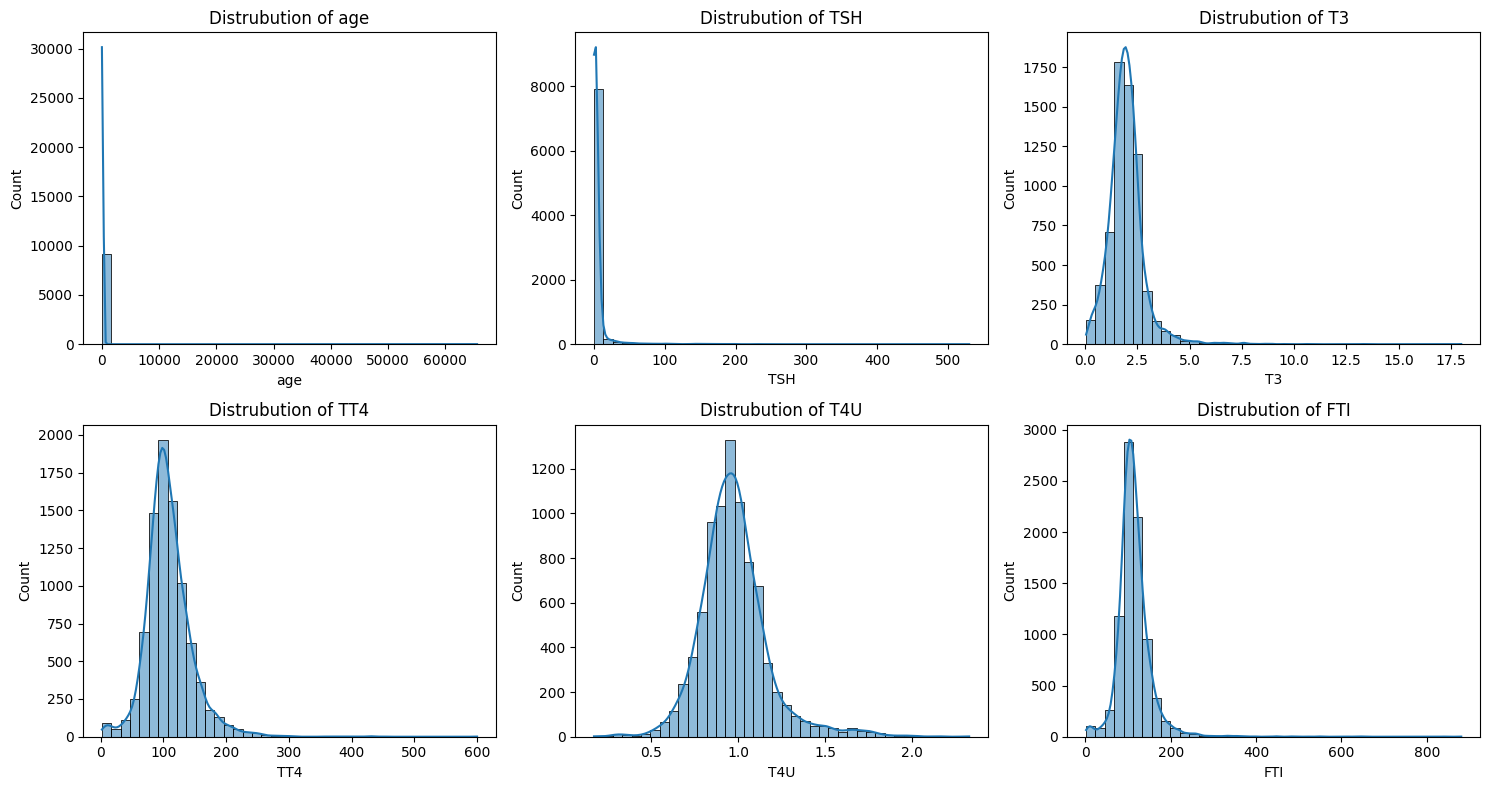

In [46]:
num_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols):
  plt.subplot(2,3,i+1)
  sns.histplot(new_df[col], bins=40, kde=True)
  plt.title(f"Distrubution of {col}")

plt.tight_layout()
plt.show()

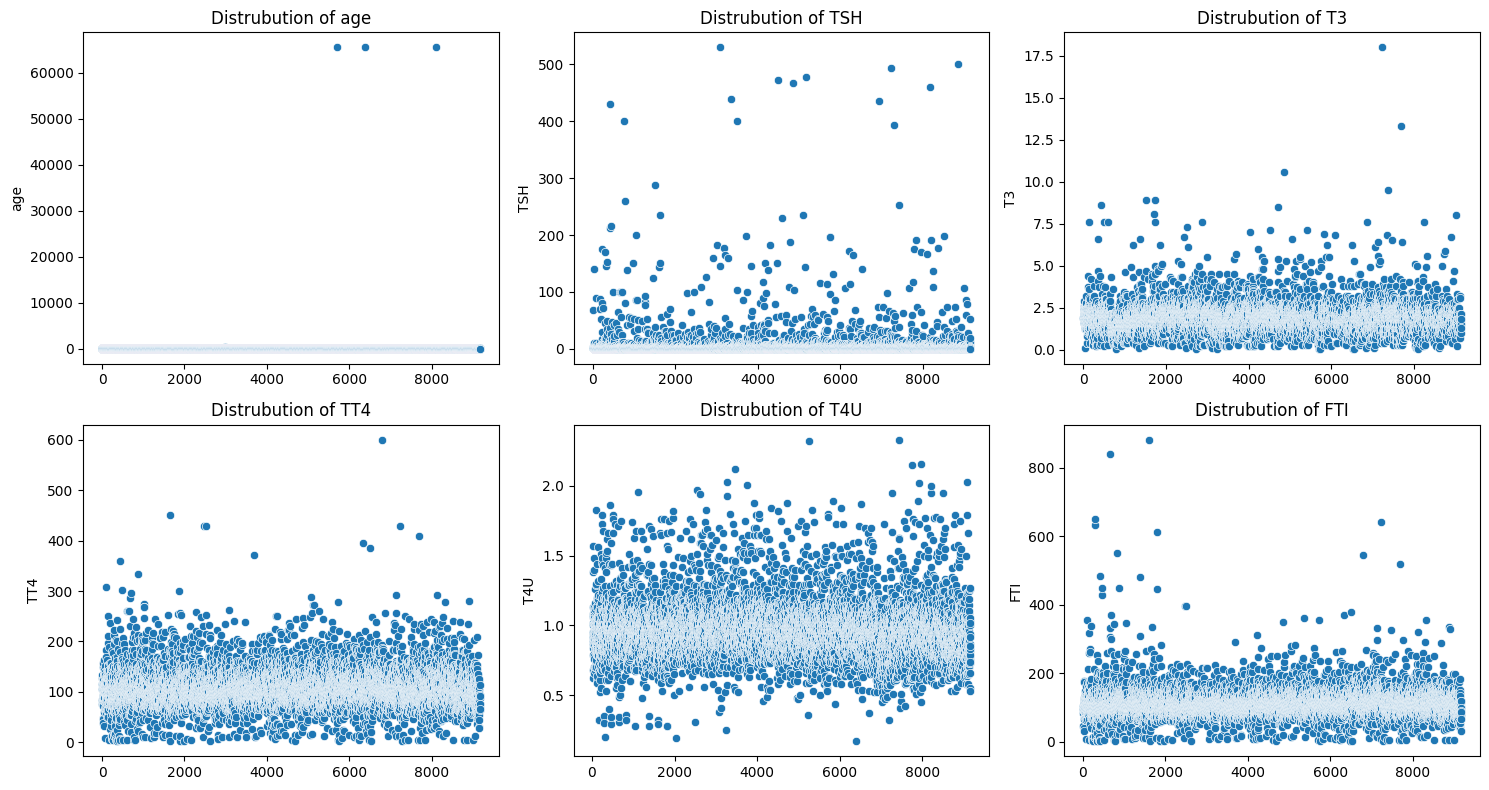

In [47]:
num_cols = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols):
  plt.subplot(2,3,i+1)
  sns.scatterplot(new_df[col])
  plt.title(f"Distrubution of {col}")

plt.tight_layout()
plt.show()

In [48]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9171 entries, 0 to 9170
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        9171 non-null   int64  
 1   sex                        8864 non-null   object 
 2   on thyroxine               9171 non-null   object 
 3   query on thyroxine         9171 non-null   object 
 4   on antithyroid medication  9171 non-null   object 
 5   sick                       9171 non-null   object 
 6   pregnant                   9171 non-null   object 
 7   thyroid surgery            9171 non-null   object 
 8   I131 treatment             9171 non-null   object 
 9   query hypothyroid          9171 non-null   object 
 10  query hyperthyroid         9171 non-null   object 
 11  lithium                    9171 non-null   object 
 12  goitre                     9171 non-null   object 
 13  tumor                      9171 non-null   objec

In [49]:
# Replace 't'/'f' with True/False
new_df.replace({'t': True, 'f': False}, inplace=True)

In [50]:
new_df.sample(10).T

,5060,7626,2545,4774,7847,5395,629,2179,5595,4089
age,61,65,70,34,78,37,26,25,54,71
sex,M,F,F,F,F,M,F,F,F,M
on thyroxine,False,False,False,False,False,False,True,False,True,True
query on thyroxine,False,False,False,False,False,False,False,False,False,False
on antithyroid medication,False,False,False,False,False,False,False,False,False,False
sick,False,False,False,False,False,False,False,False,False,False
pregnant,False,False,False,False,False,False,False,False,False,False
thyroid surgery,False,False,False,False,False,False,False,False,False,False
I131 treatment,False,False,False,False,False,False,False,False,False,False
query hypothyroid,False,False,False,False,False,False,False,False,False,True


In [51]:
new_df.sample(10).T

,4253,715,5692,4711,289,5685,2345,2296,4362,2972
age,67,56,64,58,73,40,55,78,65,33
sex,F,M,M,F,M,M,F,F,M,F
on thyroxine,True,False,False,True,False,False,False,False,False,False
query on thyroxine,False,False,False,False,False,False,False,False,False,False
on antithyroid medication,False,False,False,False,False,False,False,False,False,False
sick,False,False,True,False,False,False,False,False,False,False
pregnant,False,False,False,False,False,False,False,False,False,False
thyroid surgery,False,False,False,False,False,False,False,False,False,False
I131 treatment,False,False,False,False,False,False,False,False,False,False
query hypothyroid,False,False,False,False,False,False,False,False,False,False


In [52]:
new_df.to_csv("Thyroid-Dataset.csv",index=False)

In [53]:
new_df.shape

(9171, 23)

In [54]:
copy_newdf = new_df.copy()
# Drop rows with missing target
copy_newdf.dropna(subset=['class'], inplace=True)

In [55]:
copy_newdf.shape

(9171, 23)